## Séance 3: Risque de crédit , le risque de taux
dette non cotée : privée
dette cotée : obligation

Dans le cadre la séance d'aujourd'hui, on s'attardera sur l'axe retail , qui est relative aux dettes privée. C'est le principal risque au quel fait face la banque, qui est inhérent à la banque de détail et qui impacte les autres activités financieres.

### Le risque de taux
le taux d'intérêt est le loyer de l'argent

Dans la pratique, le taux d'intérêt est toujours annualisé.

Ce loyer vaut = taux annualisé*période*Montant

Cette définition est celle historique car très intuitive. Il peut cependant s'averer que les taux d'interêt soient négatifs. Là cette definition devient donc limitée.


Depéndamment de ce qu'on fait de son argent, le thésauriser, le prêter à la banque , ou encore à l'etat, il existe toujours un risque de perte qui subsiste. Il peut donc advenir, que dans le souci de sécuriser son argent, dans un contexte particulier (notamment incertain), le posseusseur soit disposé à payer pour securiser son argent : on parle de taux d'intérêt négatif. 

La métaphore change. On dit que le taux d'intérêt est le loyer du coffre fort.

### Notion d'obligation

Compte tenu des obligation reglementaires aux quels sont soumis les banques, elles ne peuvent pas emprunter à toutes les entreprises en besoin de financement.
C'est de là qu'intervient la notion d'obligation. La banque intervient juste comme intermediaire entre l'entreprise et le marché et beneficiera de frais de commission. le marché prête un montant M à l'entreprise et reçoit des annuités et le nominal à maturité.

**Remarque** : A mesure que l'on se rapproche de la date de paiement  d'un coupon, le prix de l'obligation augmente, puis rechute après le paiement du coupon et le processus recommence.

**Remarque** : Une entreprise qui se finance par emission de contrats obligataires à un taux d'intérêt cohérent avec le marché est une entreprise en bonne santé car les investisseurs estiment que l'entreprise est fiable et en bonne santé financiere.

**Valorisation d'un instrument financier** : l'esperance des flux actualisées sous la probabilité risque neutre (On se place sous le point devue d'un investisseur qui est neutre face au risque)

Considerons une obligation zero coupon qui paie à maturité 1. il demeure néanmoins un aléa qui subsiste sur le defaut ou non de l'émetteur de l'obligaion à maturité. (On parle de la probabilité de survie de l'emetteur)

si l'emetteur fait defaut, on doit recouvrer les dettes. On parle du taux de recouvrement.

**Remarque**: le taux de recouvrement historique est 40%

**Remarque** : le taux de recouvrement  calculé en prenant en compte juste le nominal

***La probabilité de survie** d'un emetteur est généralement modélisée via une loi de poisson. 
l'intensité de defaut lamba dicte la vitesse avec laquelle la probabilité de survie va décroitre.

PS(T) = exp(-lambda*T)

Pour valoriser une obligation on s'interessera aux 3 briques principales qui la constituent à savoir :

- les coupons en cas de survie 
- le nominal en cas de survie
- Le recouvrement en cas de defaut

A l'instant t, le coupons versé à la date Ti est valorisé par c*exp(-r(T-t))*exp(-lamba(T-t))*indicatrice(T>t)

L'intensité de defaut constante dans le temps est supposée. Dans la pratique a une structure par terme de l'intensité on évalue donc pour chaque maurité la valeur de l'intensité de défaut.

l'ensemble des coupons versés vaut donc $\sum_{i=1}^{n} (c\times exp(-r(Ti-t))\times exp(-\lambda(Ti-t))\times 1_{(Ti>t)}$


Le raisonnement est analogue pour le cas du nominal

In [198]:
# Impementation de la fonctiuon de valorisation d'un bond
import numpy as np

def Bond(t,c,T,r,lamda, R = 0.4):
    B = 0
    for T_i in range(1,T+1):
        B += np.exp(-(lamda + r)*(T_i - t))*(T_i>=t)
    B *= c
    B += (np.exp(-(r + lamda)*(T_i-t)) + lamda * R  * (1-(np.exp(-(r + lamda)*(T_i -t)))) / (r + lamda))*(T_i>=t)
    return B

In [199]:
t =0
c= 0.02
T=10
r=0.02
lamda = 0

price = Bond(t, c, T, r, lamda, R=0.4)

In [200]:
price

0.9981933497987289

On retrouve un prix d'obligation sensiblement égal au nominal. Ceci s'explique par le fait que l'obligation est remunéré au même niveau que celui du marché.

Au cas où on aurait proposé une remunération supérieure à celle du marché, elle serait beaucoup plus attractive et l'obligation se serait appréciée. l'illustration est donnée ci dessous pour c= 0.03

In [201]:
t =0
c= 0.03
T=10
r=0.02
lamda = 0

price = Bond(t, c, T, r, lamda, R=0.4)
price

1.0879246481591023

Avec une remunération inférieure à ce qu'aurait proposé le marché, on obtient une valorisation de l'obligation inférieure au nomimal 

In [202]:
t =0
c= 0.015
T=10
r=0.02
lamda = 0

price = Bond(t, c, T, r, lamda, R=0.4)
price

0.9533277006185421

### Pour un lambda different de 0, on cherche le taux coupon qui permet d'avoir une valorisation de l'obligation au pair

In [203]:
from scipy.optimize import fsolve
def equation(c): #(t, c, T, r, lambda_, R=0.4)
    return Bond(t, c, T, r, lamda = 0.01, R=0.4) - 1  # Par exemple pour T = 5, r = 3%, lambda = 2%

# Trouver la valeur de c qui satisfait l'équation
c_solution = fsolve(equation, 0.05)[0]

print(f"Le coupon annuel qui fait que l'obligation vaut 1 est : {c_solution:.6f}")


Le coupon annuel qui fait que l'obligation vaut 1 est : 0.026394


Par ailleurs, en maintenant une remunération égale à celle du marché; mais avec un lamda très grand, de l'ordre de 1000% qu'est ce qu'on obtient?

On retrouve une valeur qui se rapproche de la valeur du marché augmentée de la valeur du lambda

In [204]:
price = Bond(t=0,c =0.2, T=10, r=0.02, lamda=10, R=0.4)
price

0.39921049739265607

On se rend compte que cette valeur correspond au taux de recouvrement.

#### En prenant une intensité de defaut très élévée (Lamba = 10), on tombe très vite en défaut, presque instantannément et on recuppère uniquement ce que la liquidation judiciaire permet de recouvrer 

## On trace la fonction qui à t on associe Bt

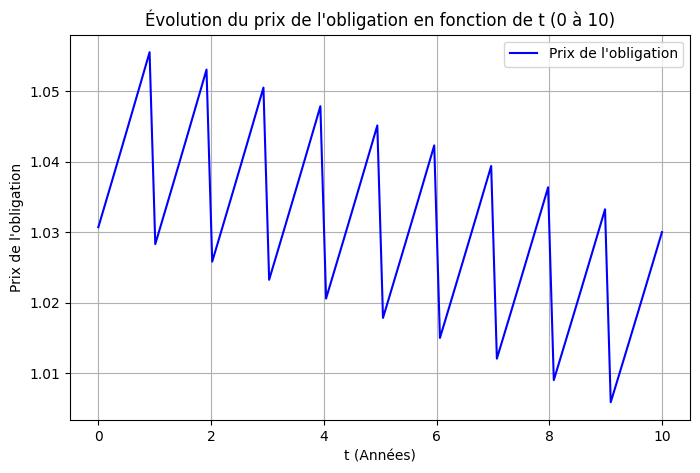

In [205]:
import matplotlib.pyplot as plt
# Paramètres
c = 0.03
T = 10
r = 0.02
lambda_ = 0.01

# Calculer les prix des obligations pour t variant de 0 à 10
t_values = np.linspace(0, 10, 100)
price_values = [Bond(t, c, T, r, lambda_) for t in t_values]

# Tracer la courbe
plt.figure(figsize=(8, 5))
plt.plot(t_values, price_values, label="Prix de l'obligation", color='blue')
plt.title("Évolution du prix de l'obligation en fonction de t (0 à 10)")
plt.xlabel("t (Années)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()

Plus on se rapproche de la date de détachement du coupon plus l'obligation devient attractive, elle  prend donc de la valeur.

La chute observée par la suite, peut laisser croire que l'obligation perd de la valeur après le détachement de coupon, alors qu'en realité il n'en est rien. En effet,  une fois le coupon détaché de l'obligation, les flux à venir diminuent et la valeur de l'obligation se deprecie de la valeur du coupon qui a été détaché.

C'est la raison pour laquelle on parle de **dirty price*** . Interpreter cette courbe donc être trompeur.

On va donc s'interesser par la suite au **clean price**  ou **pied de coupon** donné  par:
$B_t^* = B_t - coupon\_couru(cc)$

$cc = c\times(t-T^*)$  avec $T^*$ la date du denier coupon payé, qui coincide avec la partie entiere de t

En retirant cette valeur de coupon couru, on supprime cet effet de saut après les detachements de coupons

In [222]:
import math
 
def clean_price(t,c,T,r,lamda, R = 0.4):
    dirty_price = Bond(t,c,T,r,lamda, R = 0.4)
    if t<=T:
        clean_price = dirty_price -c*(t-math.floor(t))
    else:
        clean_price=0
    return(clean_price)

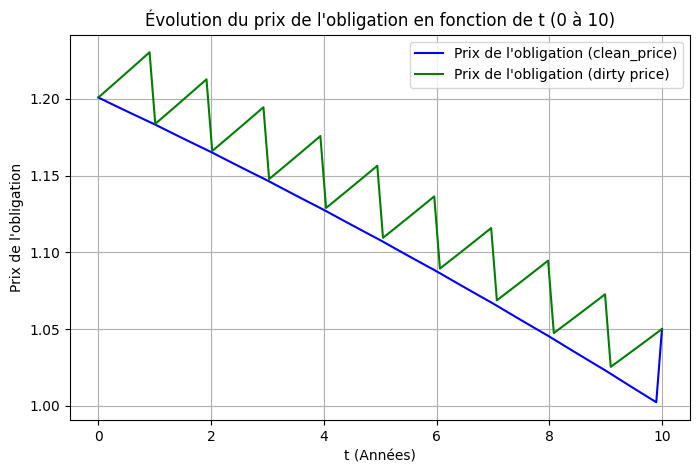

In [223]:


# Calculer les prix des obligations pour t variant de 0 à 10
t_values = np.linspace(0, 10, 100)
price_values_1 = [clean_price(t, c, T, r, lambda_) for t in t_values]
price_values_2 = [Bond(t, c, T, r, lambda_) for t in t_values]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))
plt.plot(t_values, price_values_1, label="Prix de l'obligation (clean_price)", color='blue')
plt.plot(t_values, price_values_2, label="Prix de l'obligation (dirty price)", color='green')
plt.title("Évolution du prix de l'obligation en fonction de t (0 à 10)")
plt.xlabel("t (Années)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


En retirant cette valeur de coupon couru, on supprime cet effet de saut après les detachements de coupons, et on observe une courbe sans ces discontinuités

### On teste les cas extremes pour c = 1 et 5%

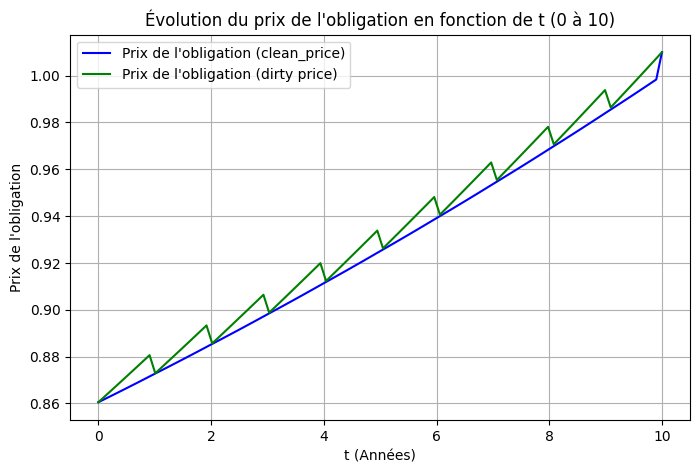

In [224]:

c= 0.01
# Calculer les prix des obligations pour t variant de 0 à 10
t_values = np.linspace(0, 10, 100)
price_values_1 = [clean_price(t, c, T, r, lambda_) for t in t_values]
price_values_2 = [Bond(t, c, T, r, lambda_) for t in t_values]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))
plt.plot(t_values, price_values_1, label="Prix de l'obligation (clean_price)", color='blue')
plt.plot(t_values, price_values_2, label="Prix de l'obligation (dirty price)", color='green')
plt.title("Évolution du prix de l'obligation en fonction de t (0 à 10)")
plt.xlabel("t (Années)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


In [209]:
t=10
clean_price(t, c, T, r, lambda_)

1.01

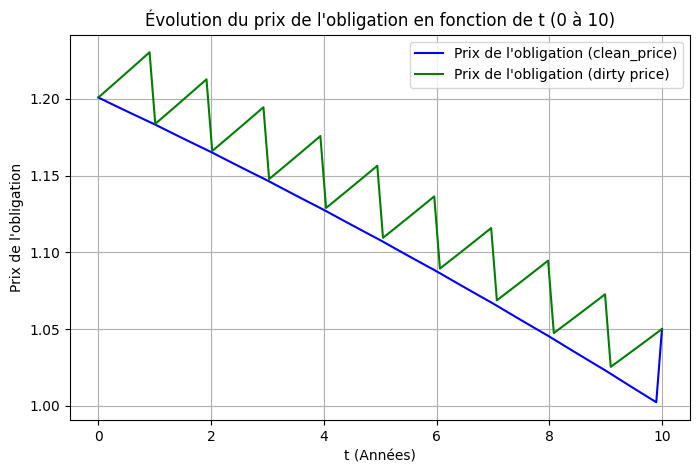

In [216]:

c= 0.05
# Calculer les prix des obligations pour t variant de 0 à 10
t_values = np.linspace(0, 10, 100)
price_values_1 = [clean_price(t, c, T, r, lambda_) for t in t_values]
price_values_2 = [Bond(t, c, T, r, lambda_) for t in t_values]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))
plt.plot(t_values, price_values_1, label="Prix de l'obligation (clean_price)", color='blue')
plt.plot(t_values, price_values_2, label="Prix de l'obligation (dirty price)", color='green')
plt.title("Évolution du prix de l'obligation en fonction de t (0 à 10)")
plt.xlabel("t (Années)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


In [218]:
t=10
Bond(t, c, T, r, lambda_)

1.05

## Les constats qu'on fait:

Lorsque c= 1%

la remunération de l'obligation est inférieure à celle du marché, donc quand elle est émise, sa valeur est necessairement en dessous du pair. d'où une valeur initiale sensiblement égale à 87%
A  maturité, on reçoit 100% plus le nominal + 1% de ce dernier qui correspond au du coupon, d'où un resultat sensiblement égal 101%.


Lorsque c = 5%

l'obligation remunère plus que ce que offre le marché, elle sera donc beaucoup demandée une fois qu'elle est émise, d'où sa valeur de depart valant 120%, au fut et à mesure que l'on détache les obligations, les flus à venir vont diminuer et sa valeur se deprécie au fur et à mesure. Jusqu'à la maturité où on reçoit 100% du nominal et 5% du montant du nominal qi correspond au coupon d'où les 105%

Il est quand même important de garder à l'esprit que l'on travaille dans un cadre simplifié dans la  mesure où le taux d'intérêt ainsi que l'intensité de defaut sont supposés constants

### Evolution du prixx du bond en fonction des taux d'intérêt



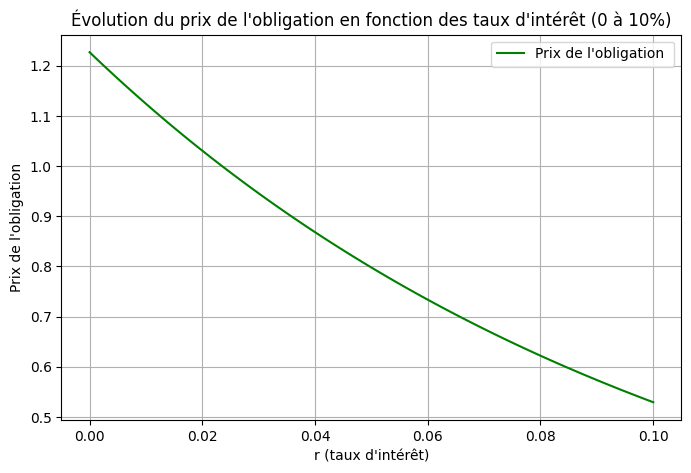

In [237]:
c= 0.03
t=0
R = 0.4
lambda_ = 0.01
T = 10

# Calculer les prix des obligations pour t variant de 0 à 10
r_values = np.linspace(0, 0.1, 100)
price_values_2 = [Bond(t, c, T, r, lambda_) for r in c_values]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))

plt.plot(r_values, price_values_2, label="Prix de l'obligation ", color='green')
plt.title("Évolution du prix de l'obligation en fonction des taux d'intérêt (0 à 10%)")
plt.xlabel("r (taux d'intérêt)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


on constate que la valeur de l'obligation se deprecie à mesure que les taux d'intérêt augmentent. economiquement, celà peut se traduire par la notion de coût d'opportunité.


## Calculons la sensibilité de l'obigation 
1bp = 0.01%

In [252]:
c= 0.03
t=0
R = 0.4
lambda_ = 0.01
T = 10
def sensi_bond(t, c, T, r, lambda_, R= 0.4, delta = 0.0001):
    B_t_r = Bond(t, c, T, r, lambda_)
    B_t_r_delta = Bond(t, c, T, r + delta, lambda_)
    term1= (B_t_r_delta - B_t_r)/delta
    sensi = -term1/B_t_r

    return sensi

In [253]:
sensi = sensi_bond(t, c, T, r, lambda_, R= 0.4, delta = 0.0001)
sensi

8.643982489105056

Ainsi, si le taux d'intérêts augmentent de 1% alors le prix de l'obligation se deprecie de 8.6%.


### On s'interesse à l'évolution de la sensibilité de l'obligation en fonction de la maturité.

On constate qu'elle croit avec la maturité et on trouve même qu'elles evoluent de maniere identique dans un cas extr^me. d'où la terminologie **duration** pour qualifier la sensibilité.

Il existe tout de même une nuance entre la duration et la maturité ou durée. la duration c'est le barycente des paiements pondérés par la valeur des flux actualisés.

En remarquant qu'on a sur la durée les paiements d'une petite fraction du nominal et qu'à la maturité on paie un coupon plus plus le nominal, le barycentre des poids associés à ces flux et qui correspond à la sensibilité sera ramené vers le nominal compte tenu du fait qu'au nominal on a un plus grand poids

Elle matérialise la durée d'exposition au risque compte tenu des flux distribués.

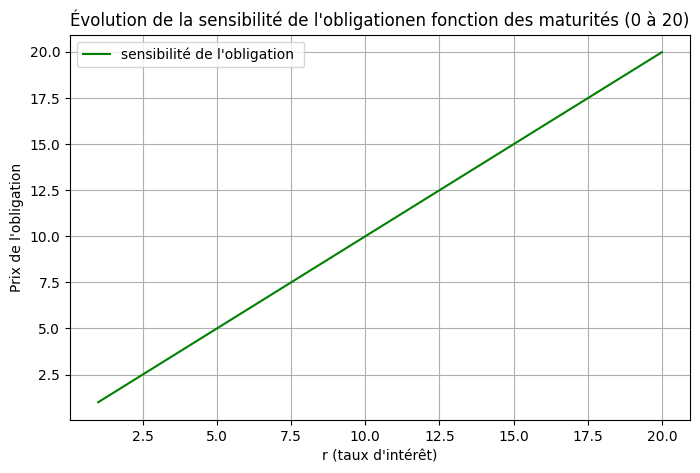

In [259]:
c= 0.03
t=0
R = 0.4
lambda_ = 0.01
T = 10

# Calculer les prix des obligations pour t variant de 0 à 10
T_values = range(1,21)
price_values_2 = [sensi_bond(t, c, T, r, lambda_) for T in range(1,21)]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))

plt.plot(T_values, price_values_2, label="sensibilité de l'obligation ", color='green')
plt.title("Évolution de la sensibilité de l'obligationen fonction des maturités (0 à 20)")
plt.xlabel("r (taux d'intérêt)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


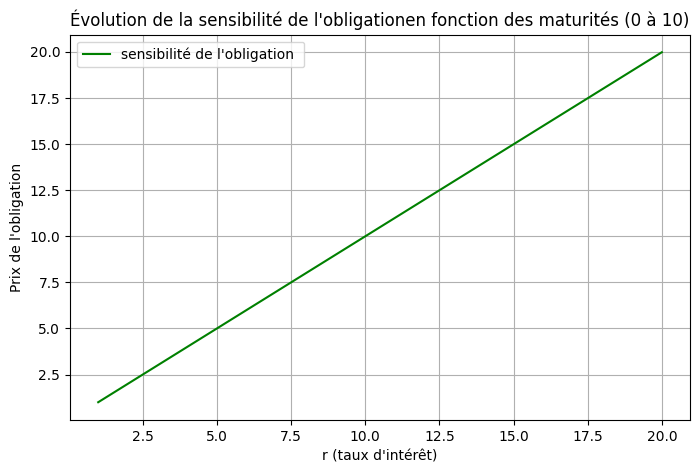

In [260]:
c= 10^-6
t=0
R = 0.4
lambda_ = 10^-6

r= 10^-6


# Calculer les prix des obligations pour t variant de 0 à 10
T_values = range(1,21)
price_values_2 = [sensi_bond(t, c, T, r, lambda_) for T in range(1,21)]

# Tracer les deux courbes
plt.figure(figsize=(8, 5))

plt.plot(T_values, price_values_2, label="sensibilité de l'obligation ", color='green')
plt.title("Évolution de la sensibilité de l'obligationen fonction des maturités (0 à 10)")
plt.xlabel("r (taux d'intérêt)")
plt.ylabel("Prix de l'obligation")
plt.grid(True)
plt.legend()
plt.show()


On retrouve que la sensibilité est linéaire.